# Estimating the accuracy of a Statistic of Interest

In [1]:
library('ISLR')
library('boot')

In [6]:
?Portfolio

       X                  Y           
 Min.   :-2.43276   Min.   :-2.72528  
 1st Qu.:-0.88847   1st Qu.:-0.88572  
 Median :-0.26889   Median :-0.22871  
 Mean   :-0.07713   Mean   :-0.09694  
 3rd Qu.: 0.55809   3rd Qu.: 0.80671  
 Max.   : 2.46034   Max.   : 2.56599  

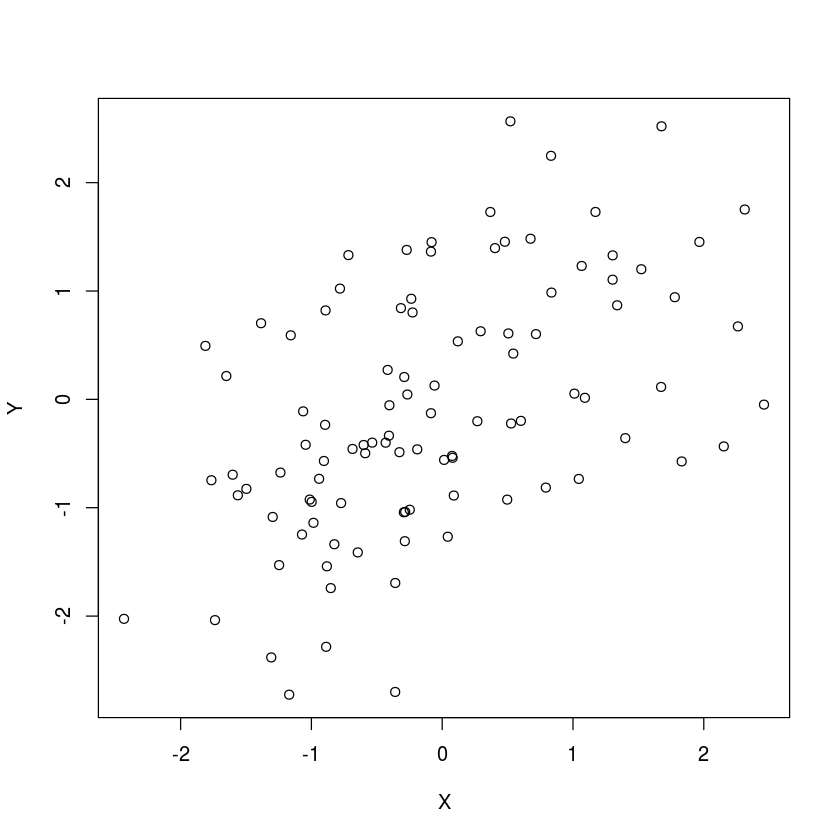

In [3]:
summary(Portfolio)
plot(Portfolio)

In [4]:
alpha.fn = function(data,index){
    X= data$X[index]
    Y= data$Y[index]
    return (var(Y)-cov(X,Y))/(var(X)+var(Y)-2*cov(X,Y))
}

In [5]:
alpha.fn(Portfolio,1:100)

[1] 0.6818792

In [8]:
### Randomly select 100 observations with replacement from the range 1 to 100
set.seed(1)
alpha.fn(Portfolio,sample(1:100,100,replace=T))

[1] 0.7940367

### Estimating alpha using boot function

In [9]:
boot(Portfolio,alpha.fn,R=1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Portfolio, statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
     original       bias    std. error
t1* 0.6818792 -0.004665562   0.1215105

# Estimating Accuracy of a Linear Regression Model

In [11]:
boot.fn = function(data,index){
    return (coef(lm(mpg~horsepower, data=data, subset=index)))
}

In [12]:
boot.fn(Auto,1:392)

(Intercept)  horsepower 
 39.9358610  -0.1578447

In [13]:
boot(Auto,boot.fn,R=1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Auto, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
      original        bias    std. error
t1* 39.9358610  0.0126152644 0.871267432
t2* -0.1578447 -0.0002691801 0.007540188

In [14]:
summary(lm(mpg~horsepower,data=Auto))


Call:
lm(formula = mpg ~ horsepower, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16
